In [10]:
import numpy as np
import pandas as pd
import sympy as sp
import math
from sympy.plotting import plot
import matplotlib.pyplot as plt

MTH220  
1.4 Assignment  
06/21/2025  
J.D.M  


## Exercise 1

### Background

There are many engineering applications in which we need to take the derivative of a function that is not known to us. For example, aerospace engineers must simulate the structural forces on a rocket booster passing through max-Q (the point of maximum aerodynamic pressure); and architects must model the effects of seismic stress on their buildings.

In many instances, all an engineer will have available is data collected through experiment.  
These situations can each be simulated using a branch of applied mathematics known as "**finite difference methods**".  



For example, let's say we're simulating the flow of air over the wing of a new airliner;  the aircraft is "embedded" in a three-dimensional "mesh", and the aerodynamic forces are calculated at each "node" point where the mesh lines intersect. This is the scenario we'll examine in this exercise.

For this to work, we'll need to simulate something similar to the definition of the derivative.
$$
f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}
$$

If we're working with a uniform one-dimensional mesh -- with the distance between adjacent nodes being the "mesh size" h -- we create a situation where 
- $x_{i+1} = x+h$ 
- and 
- $x_{i-1} = x-h$
  
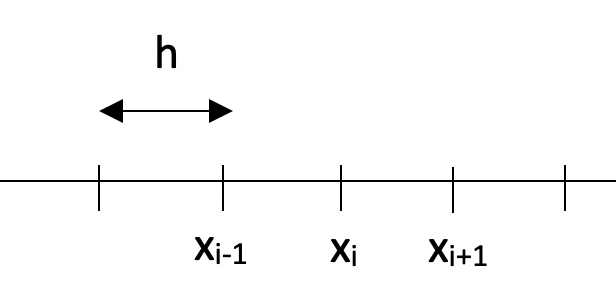  
From: https://ecpi.instructure.com/courses/145238/assignments/4611501



Since we don't know the function that provides the values, we can't take the limit as $h \to 0$, but we can approximate it. To do so, the expression that we use changes slightly depending on which direction we are comparing values along the mesh.

__**Forward difference**__
$$
f'(x_i) \approxeq \frac{f(x_{i+1}) - f(x_i)}{h}
$$

__**Backward difference**__
$$
f'(x_i) \approxeq \frac{f(x_{i}) - f(x_{i-1})}{h}
$$

Note that these are approximations to the value of the derivative, since we're not taking the limit as h goes to zero; but we can improve the approximation by taking the average of these two difference formulas:


__**Centered difference**__
$$
f'(x_i) \approxeq \frac{1}{2} \left( \frac{f(x_{i+1}) - f(x_{i})}{h} + \frac{f(x_{i}) - f(x_{i-1})}{h} \right)
$$
Simplifies to:
$$
f'(x_i) \approxeq \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$



### The Assignment

Rather than directly working with a dataset, we are going to generate our own using a known formula. This way, we get to compare the results of our efforts with the known derivative of the formula. We'll also be interested in the specific point $x_i = 1.7$.

$$\begin{align*}\Large
f(x) &= 5x^4 - 9x^3 + 2 \\
x_i &= 1.7
\end{align*}$$

In [8]:
# Find the derivative of the above expression
x = sp.symbols('x')
expr = 5*x**4 - 9*x**3 + 2
dy = sp.diff(expr, x)
dy

20*x**3 - 27*x**2

In [9]:
# Evaluate dx/dy at point x_i
xi = 1.7
dy.subs(x, xi)

20.2300000000000

Now that we know the actual derivative function and the value of $f'(x_i)$, let's apply the above concepts to see how well we can approximate the derivative using varying resolution of $h$.

In [ ]:
# Define the functions we'll be using to generate data
f = lambda x: 5*x**4 - 9*x**3 + 2

def diff_forward(x,h):
    return (f(x+h) - f(x))/h

def diff_backward(x,h):
    return (f(x) - (f(x-h)))/h

def diff_centered(x,h):
    return (diff_forward(x,h) + diff_backward(x,h))/2

In [42]:
# Generate Data
xi = 1.7

table = {}
for i in range(4):
    h = 10**-(i+1)
    table[h] = {
        'forward': diff_forward(xi, h),
        'backward': diff_backward(xi,h),
        'centered': diff_centered(xi,h)
    }

df = pd.DataFrame(table).T
df['exact'] = 20.23
df

,forward,backward,centered,exact
0.1000,24.565000,16.395000,20.480000,20.23
0.0100,20.640505,19.824495,20.232500,20.23
0.0010,20.270825,20.189225,20.230025,20.23
0.0001,20.234080,20.225920,20.230000,20.23


In [ ]:
df['forward_error'] = df['forward'] -  df['exact']
df['centered_error'] = df['centered'] - df['exact']
df

,forward,backward,centered,exact,forward_error,centered_error
0.1000,24.565000,16.395000,20.480000,20.23,4.335000,2.500000e-01
0.0100,20.640505,19.824495,20.232500,20.23,0.410505,2.500000e-03
0.0010,20.270825,20.189225,20.230025,20.23,0.040825,2.500000e-05
0.0001,20.234080,20.225920,20.230000,20.23,0.004080,2.500166e-07


#### Which formula yields a better approximation: The forward difference or the centered difference?
Even at a resolution of 0.01, the centered difference approximation was showing values close to 20.23, so it would yield the better approximations.

#### What effect does reducing the mesh size h have upon the accuracy of these approximations?
The accuracy of these approximations gets better at smaller units of $h$. This is the foundation of calculus and why we take the limit as $h \to 0$.